In [2]:
import pandas as pd
import numpy as np 

In [3]:
df = pd.read_csv('../Data/Clean Data/kepler_koi_clean.csv')

In [4]:
df

,koi_period,koi_duration,koi_depth,koi_prad,koi_ror,koi_srho,koi_sma,koi_incl,koi_teq,koi_insol,koi_impact,encoded_labels
0,9.488036,2.95750,615.8,2.26,0.022344,3.20796,0.0853,89.66,793.0,93.59,0.146,1
1,54.418383,4.50700,874.8,2.83,0.027954,3.02368,0.2734,89.57,443.0,9.11,0.586,1
2,19.899140,1.78220,10829.0,14.60,0.154046,7.29555,0.1419,88.96,638.0,39.30,0.969,0
3,1.736952,2.40641,8079.2,33.46,0.387394,0.22080,0.0267,67.09,1395.0,891.96,1.276,2
4,2.525592,1.65450,603.3,2.75,0.024064,1.98635,0.0374,85.41,1406.0,926.16,0.701,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9195,0.527699,3.22210,1579.2,29.35,0.297633,0.16318,0.0128,20.78,2088.0,4500.53,1.252,2
9196,1.739849,3.11400,48.5,0.72,0.006379,0.50770,0.0290,89.42,1608.0,1585.81,0.043,0
9197,0.681402,0.86500,103.6,1.07,0.009444,8.97692,0.0157,88.60,2218.0,5713.41,0.147,2
9198,333.486169,3.19900,639.1,19.30,0.022590,85.88623,1.2233,89.98,557.0,22.68,0.214,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.drop('encoded_labels',axis=1)

In [7]:
X

,koi_period,koi_duration,koi_depth,koi_prad,koi_ror,koi_srho,koi_sma,koi_incl,koi_teq,koi_insol,koi_impact
0,9.488036,2.95750,615.8,2.26,0.022344,3.20796,0.0853,89.66,793.0,93.59,0.146
1,54.418383,4.50700,874.8,2.83,0.027954,3.02368,0.2734,89.57,443.0,9.11,0.586
2,19.899140,1.78220,10829.0,14.60,0.154046,7.29555,0.1419,88.96,638.0,39.30,0.969
3,1.736952,2.40641,8079.2,33.46,0.387394,0.22080,0.0267,67.09,1395.0,891.96,1.276
4,2.525592,1.65450,603.3,2.75,0.024064,1.98635,0.0374,85.41,1406.0,926.16,0.701
...,...,...,...,...,...,...,...,...,...,...,...
9195,0.527699,3.22210,1579.2,29.35,0.297633,0.16318,0.0128,20.78,2088.0,4500.53,1.252
9196,1.739849,3.11400,48.5,0.72,0.006379,0.50770,0.0290,89.42,1608.0,1585.81,0.043
9197,0.681402,0.86500,103.6,1.07,0.009444,8.97692,0.0157,88.60,2218.0,5713.41,0.147
9198,333.486169,3.19900,639.1,19.30,0.022590,85.88623,1.2233,89.98,557.0,22.68,0.214


In [8]:
y=df['encoded_labels']

In [9]:
y

0       1
1       1
2       0
3       2
4       1
       ..
9195    2
9196    0
9197    2
9198    0
9199    2
Name: encoded_labels, Length: 9200, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier 

In [12]:
rf_model = RandomForestClassifier(n_estimators=400, random_state=50)

In [13]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=50)

In [14]:
y_pred = rf_model.predict(X_test) 

In [15]:
from sklearn.metrics import classification_report, confusion_matrix 


In [16]:
# Evaluation
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[154 103 118]
 [ 78 426  45]
 [ 96  60 760]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       375
           1       0.72      0.78      0.75       549
           2       0.82      0.83      0.83       916

    accuracy                           0.73      1840
   macro avg       0.67      0.67      0.67      1840
weighted avg       0.72      0.73      0.72      1840



In [18]:
# Install imblearn if not already installed
# !pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming your KOI dataframe is df_useful and target column is 'koi_disposition'
X = df.drop(columns=['encoded_labels'])
y = df['encoded_labels']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check original class distribution
print("Before resampling:", Counter(y_train))

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("After resampling:", Counter(y_res))


Before resampling: Counter({2: 3665, 1: 2195, 0: 1500})
After resampling: Counter({2: 3665, 0: 3665, 1: 3665})


In [ ]:
from sklearn.metrics import accuracy_score
# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on resampled data
rf_clf.fit(X_res, y_res)

# Make predictions on test set
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  


Accuracy on test set: 0.7086956521739131

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.57      0.48       375
           1       0.74      0.72      0.73       549
           2       0.87      0.76      0.81       916

    accuracy                           0.71      1840
   macro avg       0.68      0.68      0.67      1840
weighted avg       0.74      0.71      0.72      1840


Confusion Matrix:
 [[212  84  79]
 [124 398  27]
 [164  58 694]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# -----------------------------
# Assuming df is your KOI dataframe
# X = features, y = target
X = df.drop(columns=['encoded_labels'])
y = df['encoded_labels']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Apply SMOTE on training set
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)
print("Resampled class distribution:", Counter(y_res))

# -----------------------------
# Random Forest with hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}
 
# RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='f1_macro'
)

# Train
random_search.fit(X_res, y_res)

# Best RF model
best_rf = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# -----------------------------
# Evaluate on test set
y_pred = best_rf.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# Optional: Feature importance
importances = best_rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print("\nTop 10 Important Features:\n", feat_imp_df.head(10))


Original class distribution: Counter({2: 3665, 1: 2195, 0: 1500})
Resampled class distribution: Counter({2: 3665, 0: 3665, 1: 3665})
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=15, 

In [51]:
import seaborn as sns


<Axes: xlabel='encoded_labels'>

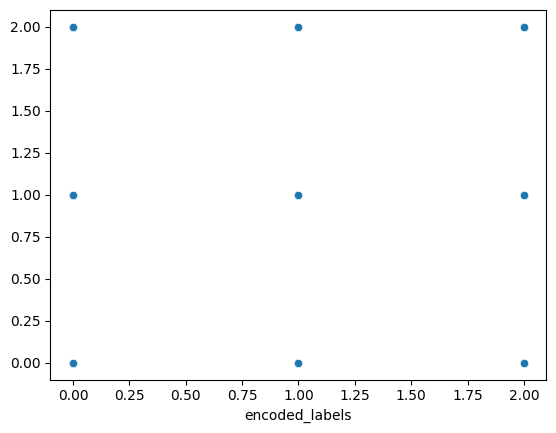

In [38]:
sns.scatterplot(x=y_test,y=y_pred)

D:\Temp\ipykernel_10368\2877970134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


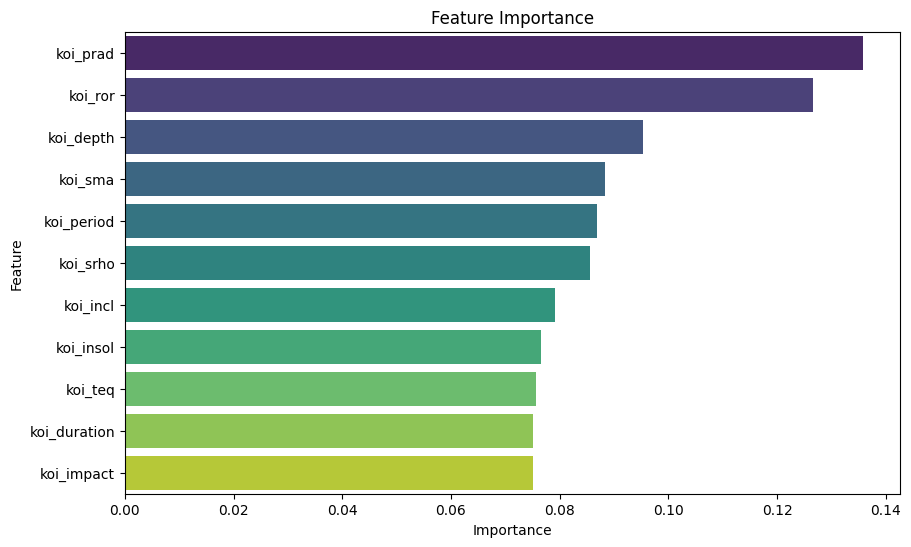

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [70]:
feat_df

,Feature,Importance
3,koi_prad,0.135811
4,koi_ror,0.126552
2,koi_depth,0.095369
6,koi_sma,0.088299
0,koi_period,0.086891
5,koi_srho,0.085666
7,koi_incl,0.079061
9,koi_insol,0.076490
8,koi_teq,0.075669
1,koi_duration,0.075107


In [ ]:
feat_df['Importance'].std()  

0.021065424780153028

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator
from typing import Dict, Any

# =======================
# Functions
# =======================
def evaluate_models(X_train, y_train, X_test, y_test,
                    models: Dict[str, BaseEstimator], 
                    params: Dict[str, Dict[str, Any]]) -> (Dict[str, float], Dict[str, BaseEstimator]):
    """
    Evaluate multiple models with GridSearchCV and return:
    - model_report: dict of test accuracy
    - fitted_models: dict of trained models
    """
    model_report: Dict[str, float] = {}
    fitted_models: Dict[str, BaseEstimator] = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        param_grid = params.get(model_name, {})
        
        if param_grid:  # If hyperparameters are provided
            grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,
                                scoring='accuracy', n_jobs=-1, verbose=0)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)
            best_model = model

        fitted_models[model_name] = best_model

        y_pred = best_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        model_report[model_name] = acc
    
    return model_report, fitted_models

def get_classification_score(y_true, y_pred) -> Dict[str, float]:
    """
    Return basic classification metrics in a dictionary.
    """
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1_score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# =======================
# Models & Hyperparameters
# =======================
models = {
    "Random Forest": RandomForestClassifier(verbose=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(verbose=0),
    "Logistic Regression": LogisticRegression(max_iter=1000, verbose=0),
    "AdaBoost": AdaBoostClassifier()
}

params = {
    "Decision Tree": {'criterion': ['gini', 'entropy', 'log_loss']},
    "Random Forest": {'n_estimators': [8,16,32,128,256]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],
                          'subsample':[0.6,0.7,0.75,0.85,0.9],
                          'n_estimators':[8,16,32,64,128,256]},
    "Logistic Regression": {},
    "AdaBoost": {'learning_rate':[.1,.01,.001],
                 'n_estimators':[8,16,32,64,128,256]}
}

# =======================
# Evaluate models
# =======================
model_report, fitted_models = evaluate_models(X_train, y_train, X_test, y_test, models, params)

# Best model selection
best_model_name = max(model_report, key=model_report.get)
best_model = fitted_models[best_model_name]  # <- Use the fitted model
best_score = model_report[best_model_name]

# Train & test predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Metrics
train_metrics = get_classification_score(y_train, y_train_pred)
test_metrics = get_classification_score(y_test, y_test_pred)

# =======================
# Full report 
# =======================
full_report = {
    'model_report': model_report,
    'best_model_name': best_model_name,
    'best_model_score': best_score,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics
}

print("========== Full Report ==========")
for k, v in full_report.items():
    print(f"{k}: {v}")


Evaluating Random Forest...


d:\ET23BTCO123\Udemy Course\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Evaluating Decision Tree...
Evaluating Gradient Boosting...
Evaluating Logistic Regression...


d:\ET23BTCO123\Udemy Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating AdaBoost...
========== Full Report ==========
model_report: {'Random Forest': 0.7135869565217391, 'Decision Tree': 0.6614130434782609, 'Gradient Boosting': 0.7260869565217392, 'Logistic Regression': 0.6516304347826087, 'AdaBoost': 0.6619565217391304}
best_model_name: Gradient Boosting
best_model_score: 0.7260869565217392
train_metrics: {'accuracy': 0.8434782608695652, 'precision': 0.8439417017965873, 'recall': 0.8434782608695652, 'f1_score': 0.841359389275321}
test_metrics: {'accuracy': 0.7260869565217392, 'precision': 0.7214735666887658, 'recall': 0.7260869565217392, 'f1_score': 0.7226228580798586}
